<a href="https://colab.research.google.com/github/udayameister/Multimodel_GNN/blob/main/Multimodel_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Preprocess the Data
# Load the dataset
adni_data = pd.read_csv('/content/ADNIMERGE_27Jun2024.csv')

<ipython-input-1-0dea9e752b74>:13: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni_data = pd.read_csv('/content/ADNIMERGE_27Jun2024.csv')


In [2]:
# Select relevant columns and filter for AD and NC
columns_of_interest = ['AGE', 'PTGENDER', 'PTEDUCAT', 'MMSE', 'CDRSB', 'ADAS11', 'DX']
adni_data = adni_data[columns_of_interest]
adni_data = adni_data[adni_data['DX'].isin(['AD', 'CN'])]

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode the diagnosis column
label_encoder = LabelEncoder()
adni_data['DX'] = label_encoder.fit_transform(adni_data['DX'])

In [5]:

# Encode gender column if present
adni_data['PTGENDER'] = label_encoder.fit_transform(adni_data['PTGENDER'])

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
adni_data['PTGENDER'] = label_encoder.fit_transform(adni_data['PTGENDER'])
adni_data['DX'] = label_encoder.fit_transform(adni_data['DX'])

In [7]:
# Split data into features and target
X = adni_data.drop('DX', axis=1)
y = adni_data['DX']


In [8]:
# Ensure the same length of X and y
assert len(X) == len(y), "The number of samples in X and y do not match."

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Step 2: Define the Models
def create_model_1():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_3():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_4():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_5():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

In [15]:
# List of model creation functions
model_creators = [create_model_1, create_model_2, create_model_3, create_model_4, create_model_5]


In [18]:
# List of model creation functions
model_creators = [create_model_1, create_model_2, create_model_3, create_model_4, create_model_5]

results = []

for i, create_model in enumerate(model_creators):
    print(f"Training model {i+1}")
    model = create_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model
    y_pred_train = model.predict(X_train).ravel()
    y_pred_test = model.predict(X_test).ravel()

    y_pred_train_class = (y_pred_train > 0.5).astype(int)
    y_pred_test_class = (y_pred_test > 0.5).astype(int)

    train_accuracy = accuracy_score(y_train, y_pred_train_class)
    test_accuracy = accuracy_score(y_test, y_pred_test_class)

    print(f"Model {i+1} - Test Accuracy: {test_accuracy:.2f}")

    results.append({
        'model': f'Model {i+1}',
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'history': history
    })


Training model 1
26/26 [==============================] - 0s 1ms/step
Model 1 - Test Accuracy: 1.00
Training model 2
26/26 [==============================] - 0s 1ms/step
Model 2 - Test Accuracy: 1.00
Training model 3
26/26 [==============================] - 0s 1ms/step
Model 3 - Test Accuracy: 1.00
Training model 4
26/26 [==============================] - 0s 1ms/step
Model 4 - Test Accuracy: 1.00
Training model 5
26/26 [==============================] - 0s 1ms/step
Model 5 - Test Accuracy: 1.00


In [19]:
# List of model creation functions
model_creators = [create_model_1, create_model_2, create_model_3, create_model_4, create_model_5]

results = []

for i, create_model in enumerate(model_creators):
    print(f"Training model {i+1}")
    model = create_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model
    y_pred_train = model.predict(X_train).ravel()
    y_pred_test = model.predict(X_test).ravel()

    y_pred_train_class = (y_pred_train > 0.5).astype(int)
    y_pred_test_class = (y_pred_test > 0.5).astype(int)

    train_accuracy = accuracy_score(y_train, y_pred_train_class)
    test_accuracy = accuracy_score(y_test, y_pred_test_class)

    print(f"Model {i+1} - Test Accuracy: {test_accuracy:.2f}")

    results.append({
        'model': f'Model {i+1}',
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'history': history
    })


Training model 1
26/26 [==============================] - 0s 1ms/step
Model 1 - Test Accuracy: 1.00
Training model 2
26/26 [==============================] - 0s 2ms/step
Model 2 - Test Accuracy: 1.00
Training model 3
26/26 [==============================] - 0s 3ms/step
Model 3 - Test Accuracy: 1.00
Training model 4
26/26 [==============================] - 0s 2ms/step
Model 4 - Test Accuracy: 1.00
Training model 5
26/26 [==============================] - 0s 1ms/step
Model 5 - Test Accuracy: 1.00



Comparison of Model Performance:
     model  train_accuracy  test_accuracy
0  Model 1             1.0            1.0
1  Model 2             1.0            1.0
2  Model 3             1.0            1.0
3  Model 4             1.0            1.0
4  Model 5             1.0            1.0


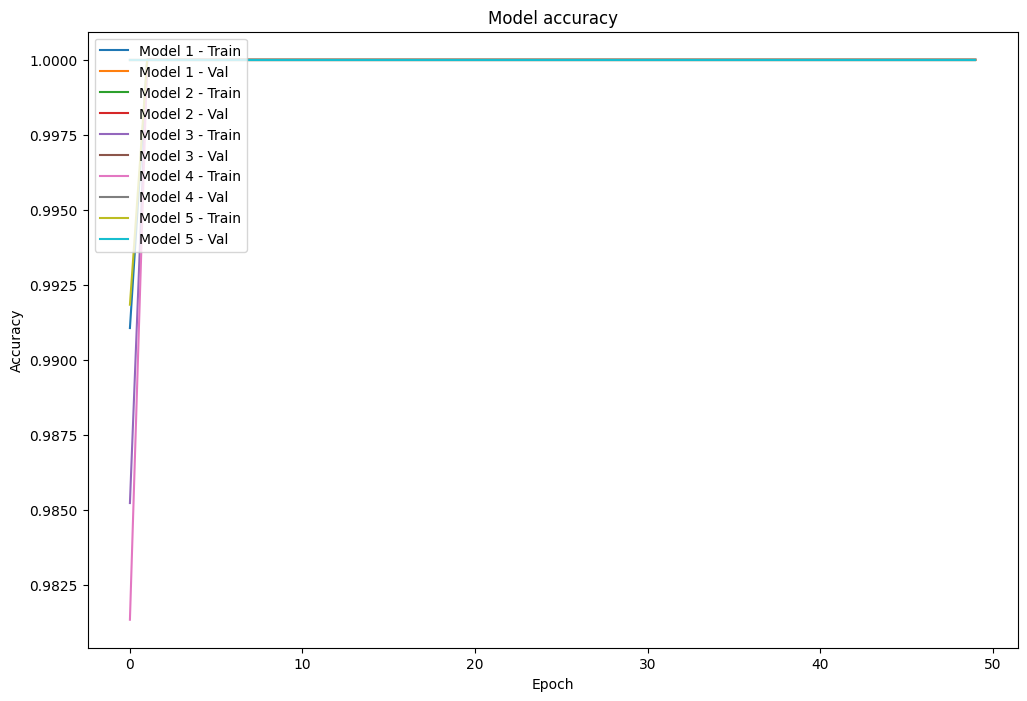

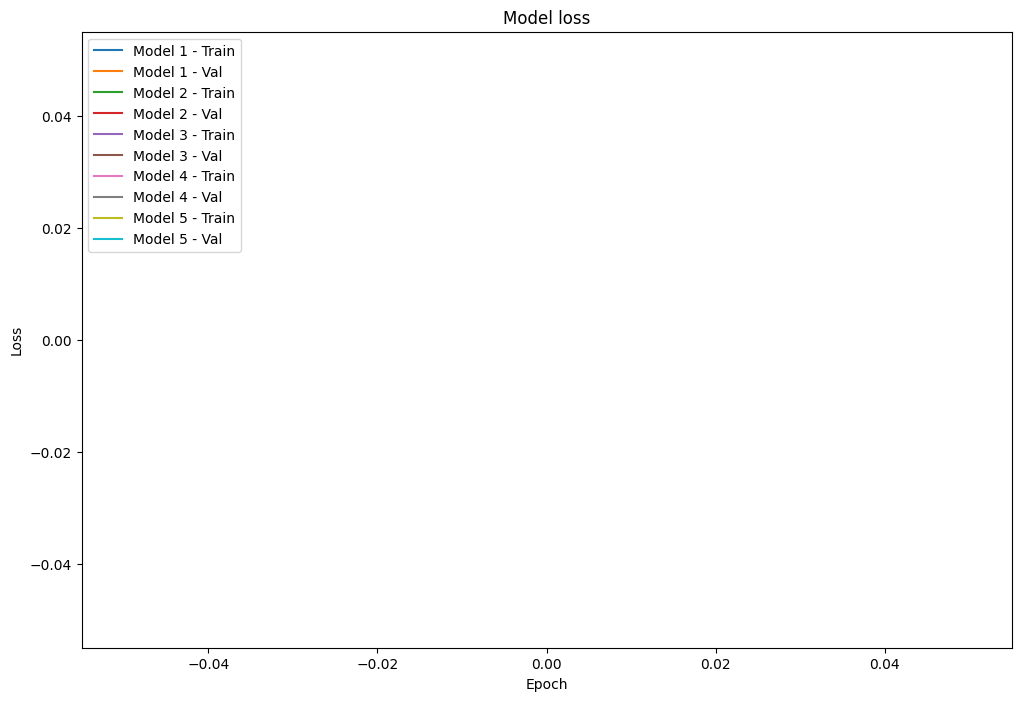

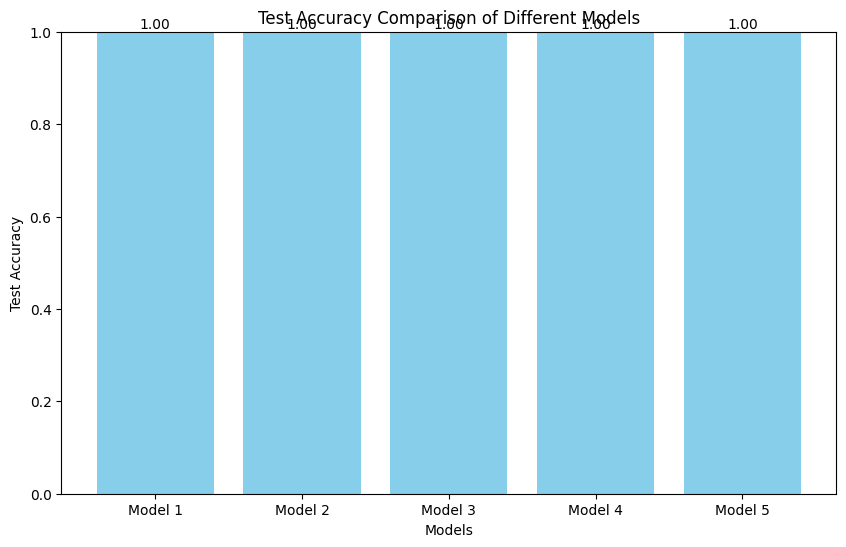

In [20]:
# Create a DataFrame to hold the results
results_df = pd.DataFrame(results)

print("\nComparison of Model Performance:")
print(results_df[['model', 'train_accuracy', 'test_accuracy']])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 8))
for result in results:
    plt.plot(result['history'].history['accuracy'], label=f"{result['model']} - Train")
    plt.plot(result['history'].history['val_accuracy'], label=f"{result['model']} - Val")
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 8))
for result in results:
    plt.plot(result['history'].history['loss'], label=f"{result['model']} - Train")
    plt.plot(result['history'].history['val_loss'], label=f"{result['model']} - Val")
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['model'], results_df['test_accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Different Models')
plt.ylim(0, 1)
for index, value in enumerate(results_df['test_accuracy']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')
plt.show()